In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext lab_black

In [3]:
raw = pd.read_csv("./data/train.csv")
greeks = pd.read_csv("./data/greeks.csv")

In [4]:
raw

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,0
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,0
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,9.256996,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,0


In [5]:
raw.columns

Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')

In [6]:
raw["Class"].value_counts()

Class
0    509
1    108
Name: count, dtype: int64

In [7]:
greeks.head()

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020


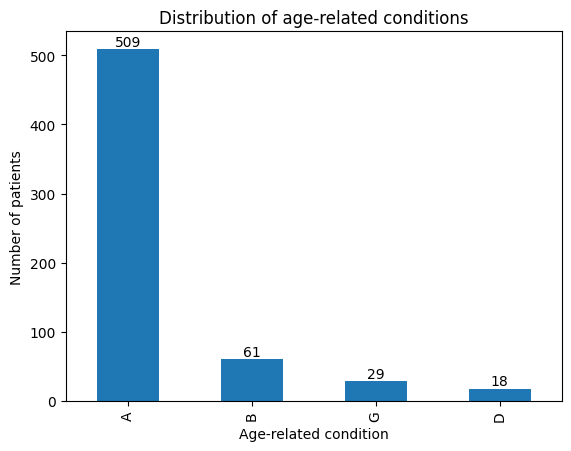

In [8]:
greeks["Alpha"].value_counts().plot(kind="bar")
plt.title("Distribution of age-related conditions")
plt.bar_label(plt.gca().containers[0])
plt.xlabel("Age-related condition")
plt.ylabel("Number of patients")
plt.show()

### Reflection
It seems that each patient shows only one of the three conditions

## Try to find if there is any significant feature for each of the conditions
### Identify the patients that have each of the conditions

In [9]:
df = pd.merge(raw, greeks, on="Id")

<Axes: >

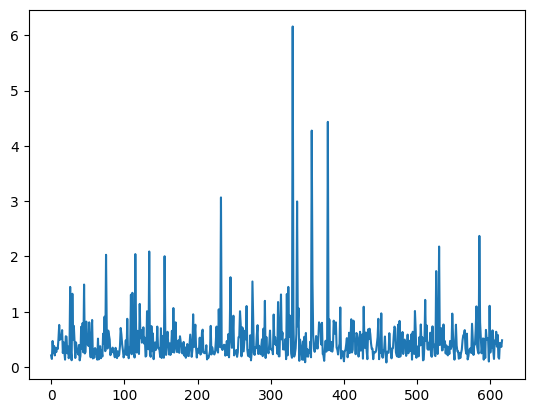

In [10]:
df["AB"].plot(kind="line")

In [11]:
patients_healthy = df[df["Alpha"] == "A"]
patients_b = df[df["Alpha"] == "B"]
patients_d = df[df["Alpha"] == "D"]
patients_g = df[df["Alpha"] == "G"]

In [12]:
patients_b["AB"].describe()

count    61.000000
mean      0.551917
std       0.492800
min       0.132463
25%       0.311929
50%       0.423027
75%       0.636677
max       3.068014
Name: AB, dtype: float64

In [13]:
patients_d["AB"].describe()

count    18.000000
mean      1.013176
std       1.363654
min       0.132463
25%       0.467893
50%       0.583265
75%       0.740297
max       6.161666
Name: AB, dtype: float64

In [14]:
patients_g["AB"].describe()

count    29.000000
mean      1.048948
std       0.806473
min       0.465757
25%       0.615312
50%       0.756321
75%       1.008428
max       4.435374
Name: AB, dtype: float64

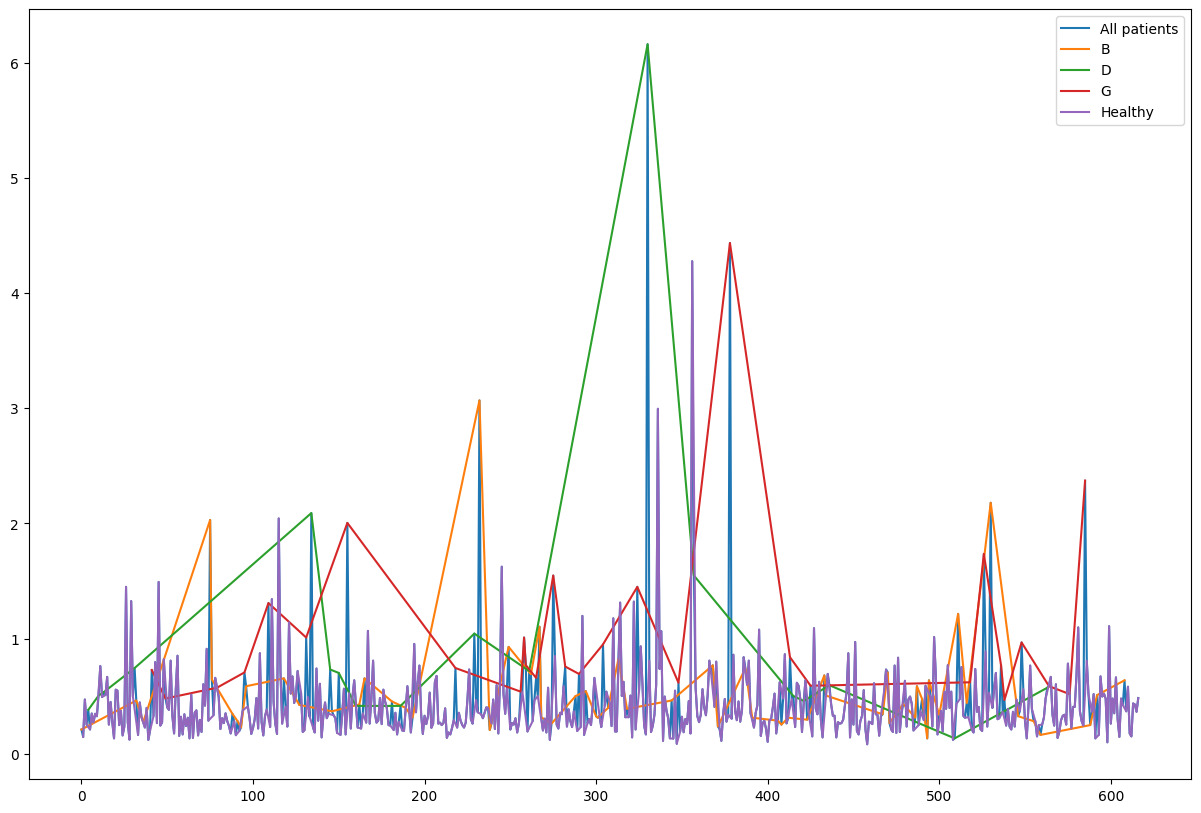

In [15]:
fig, ax = plt.subplots(figsize=(15, 10))
df["AB"].plot(kind="line")
patients_b["AB"].plot(kind="line")
patients_d["AB"].plot(kind="line")
patients_g["AB"].plot(kind="line")
patients_healthy["AB"].plot(kind="line")
plt.legend(["All patients", "B", "D", "G", "Healthy"])
plt.show()

In [16]:
# numeric columns and remove the class column
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove("Class")

In [17]:
numeric_cols

['AB',
 'AF',
 'AH',
 'AM',
 'AR',
 'AX',
 'AY',
 'AZ',
 'BC',
 'BD ',
 'BN',
 'BP',
 'BQ',
 'BR',
 'BZ',
 'CB',
 'CC',
 'CD ',
 'CF',
 'CH',
 'CL',
 'CR',
 'CS',
 'CU',
 'CW ',
 'DA',
 'DE',
 'DF',
 'DH',
 'DI',
 'DL',
 'DN',
 'DU',
 'DV',
 'DY',
 'EB',
 'EE',
 'EG',
 'EH',
 'EL',
 'EP',
 'EU',
 'FC',
 'FD ',
 'FE',
 'FI',
 'FL',
 'FR',
 'FS',
 'GB',
 'GE',
 'GF',
 'GH',
 'GI',
 'GL']

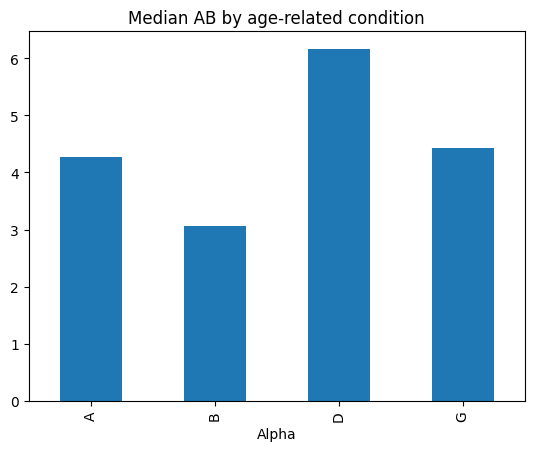

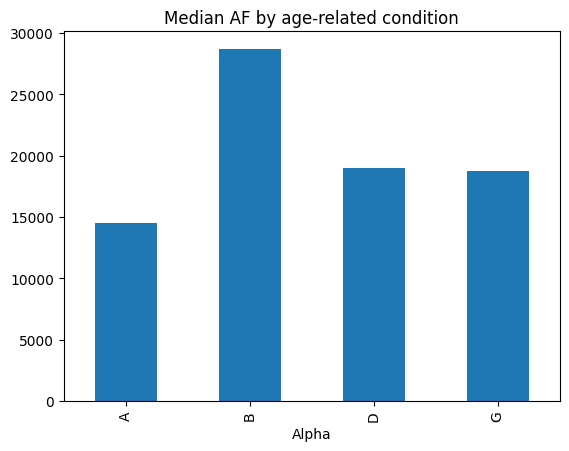

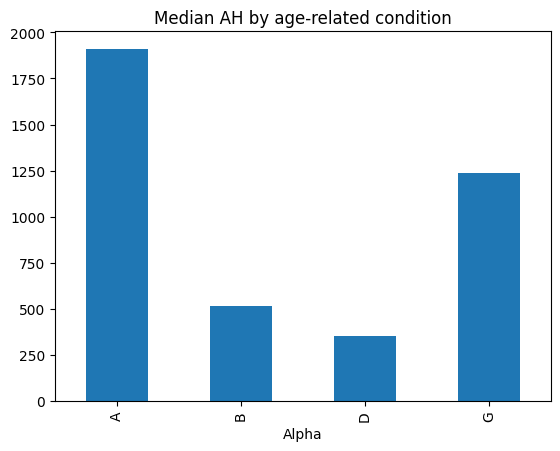

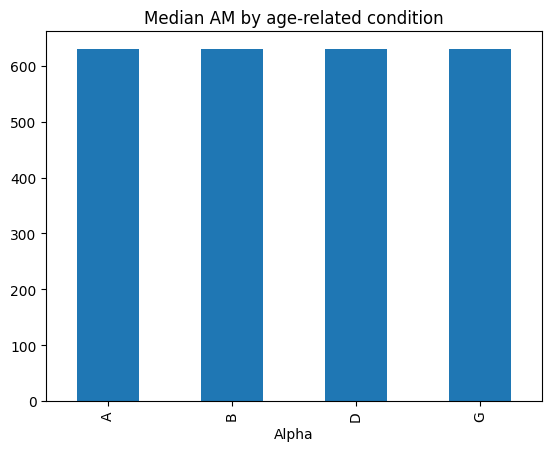

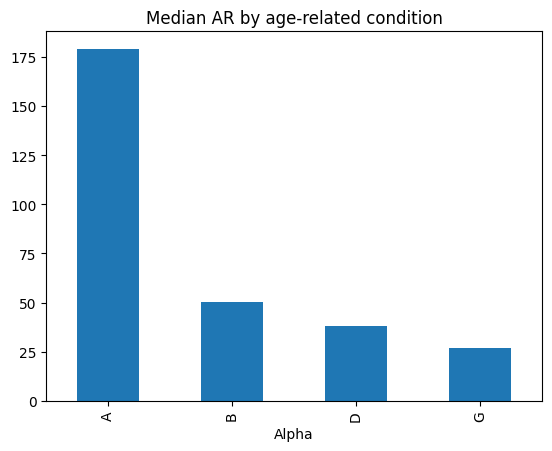

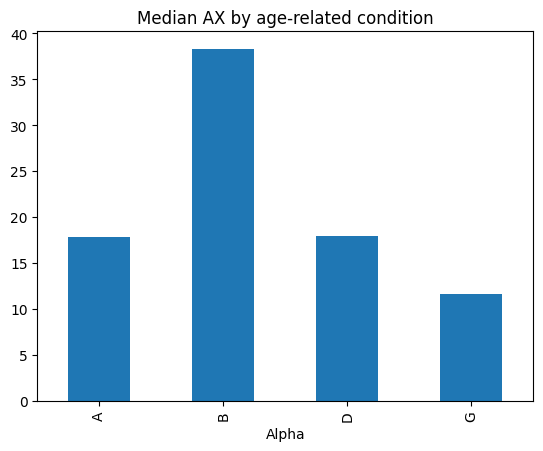

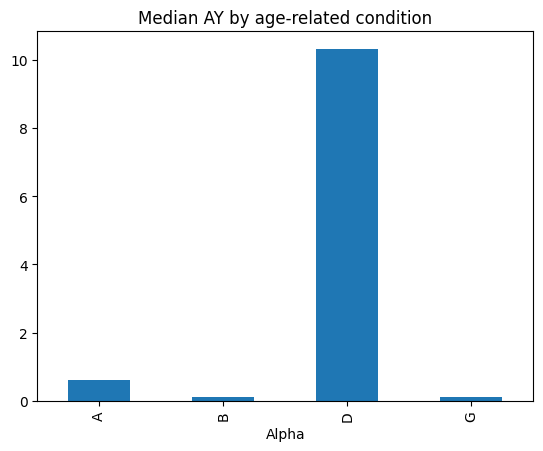

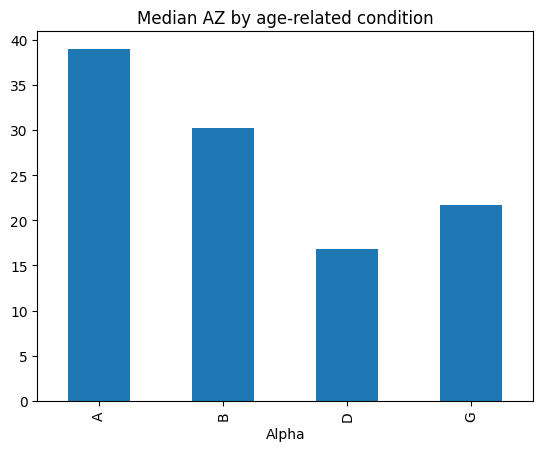

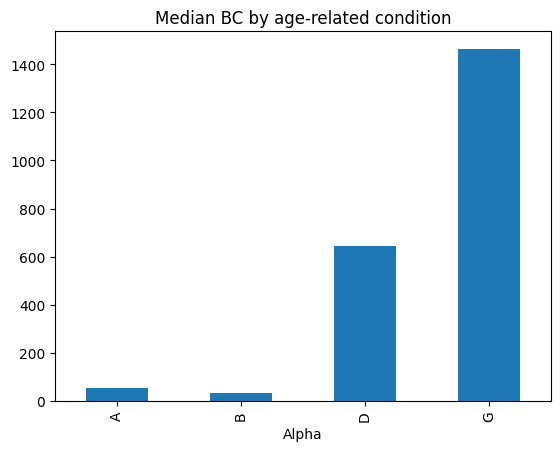

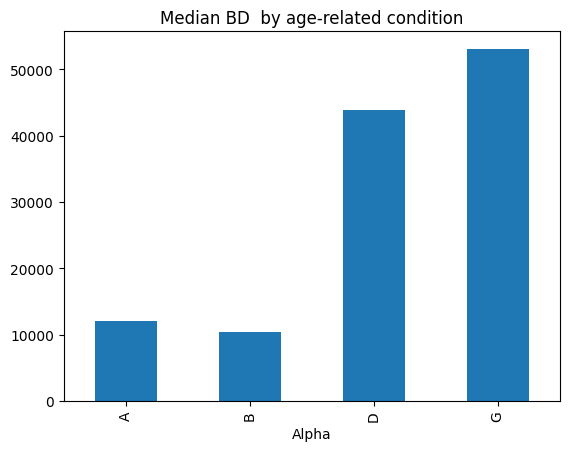

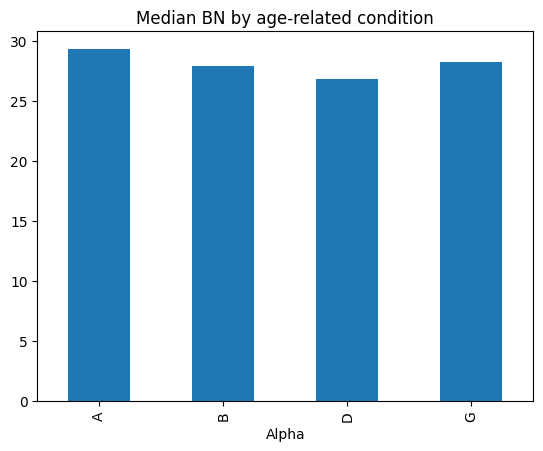

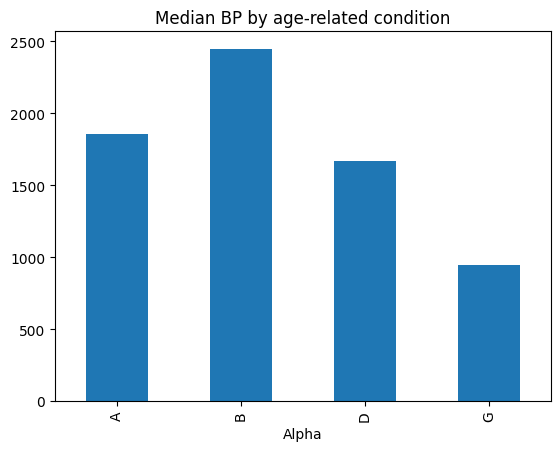

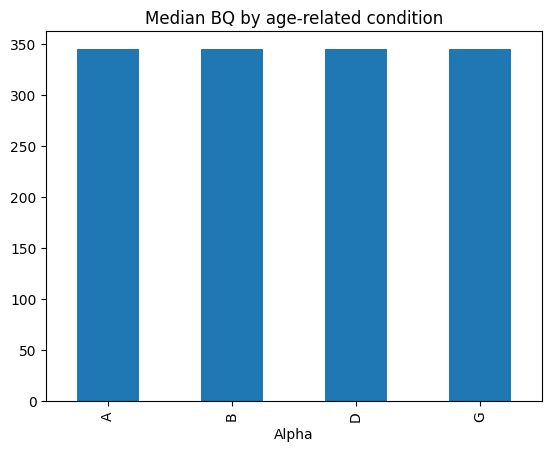

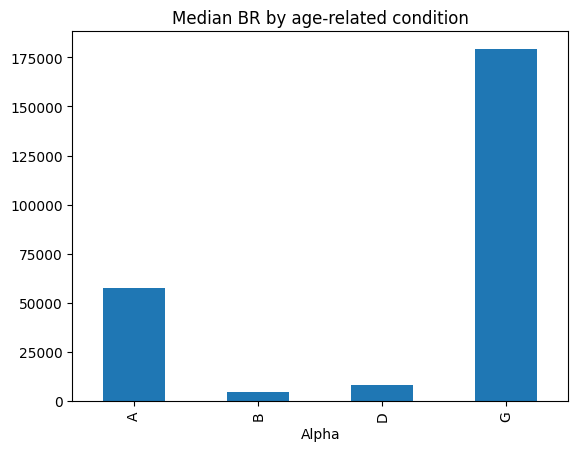

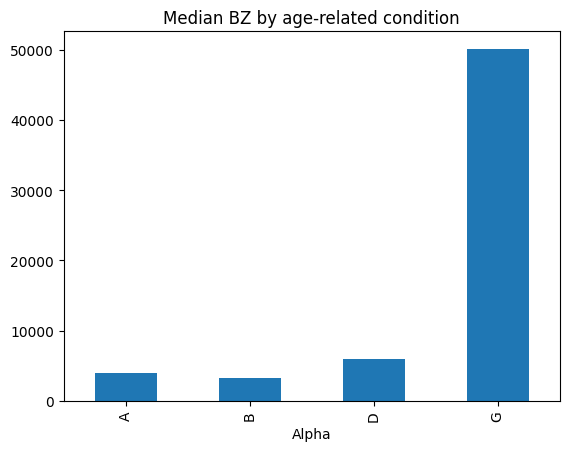

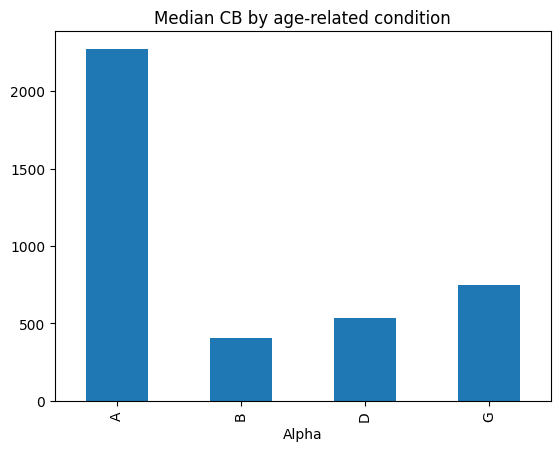

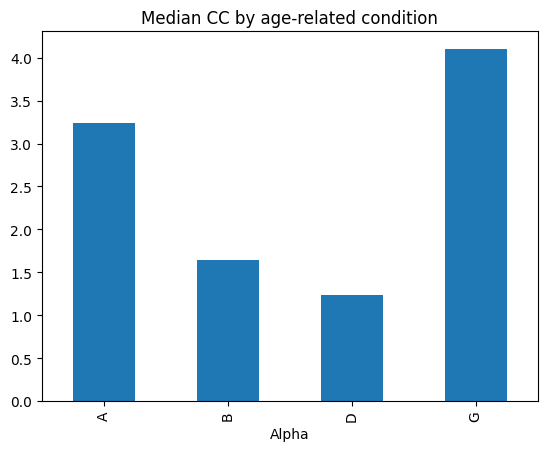

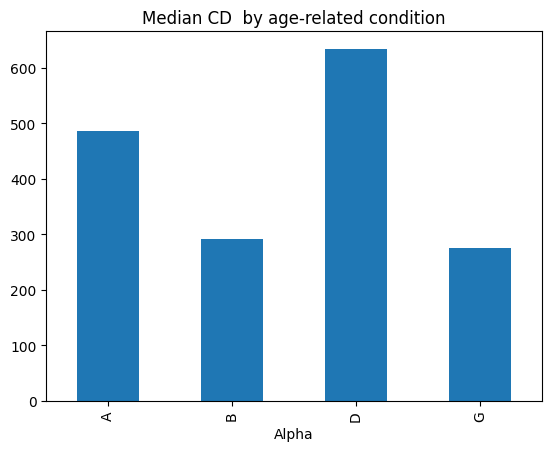

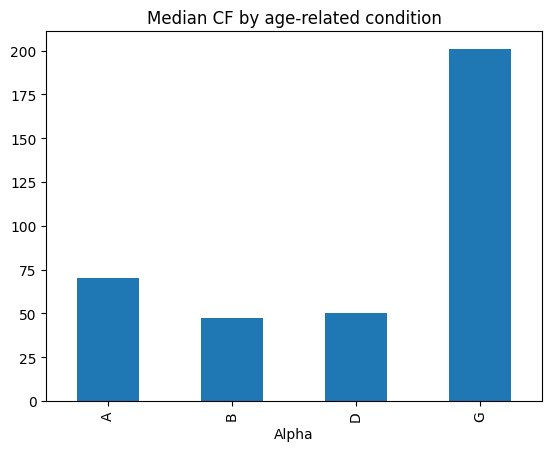

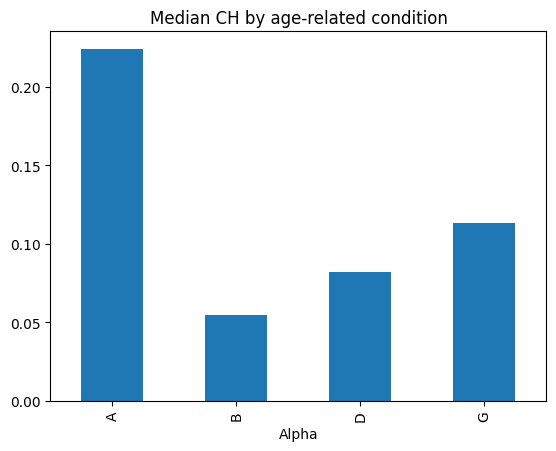

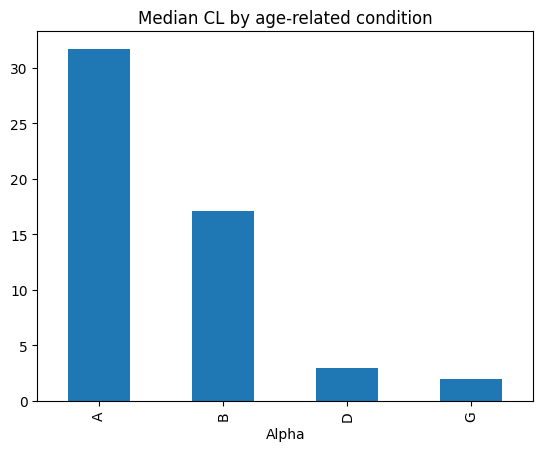

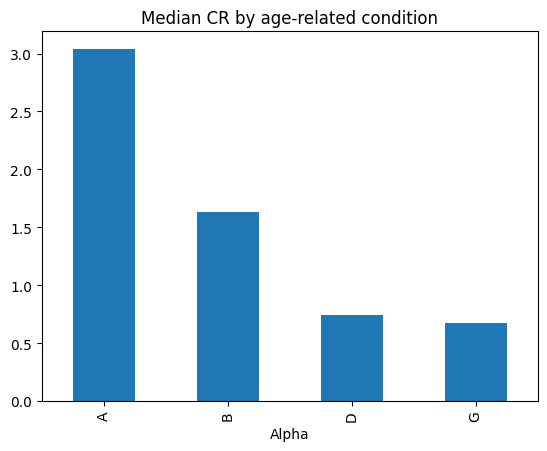

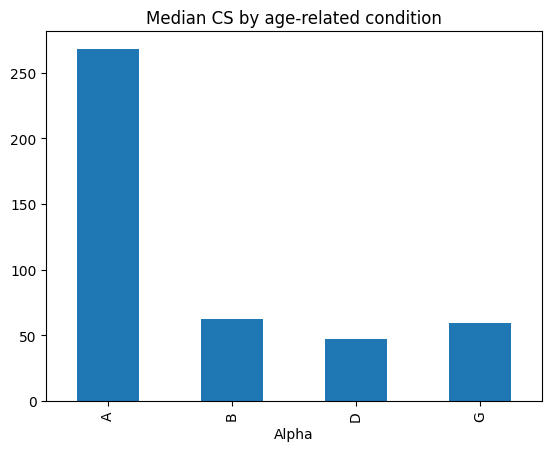

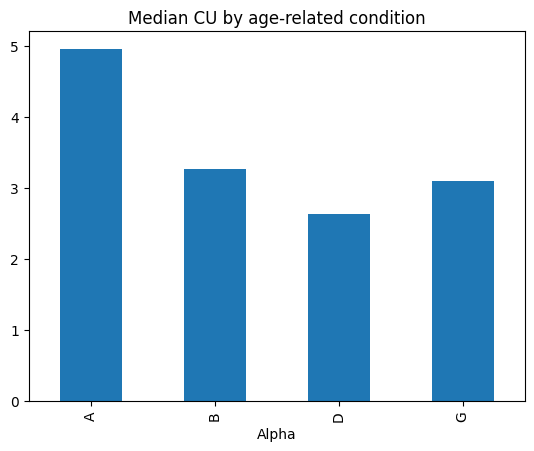

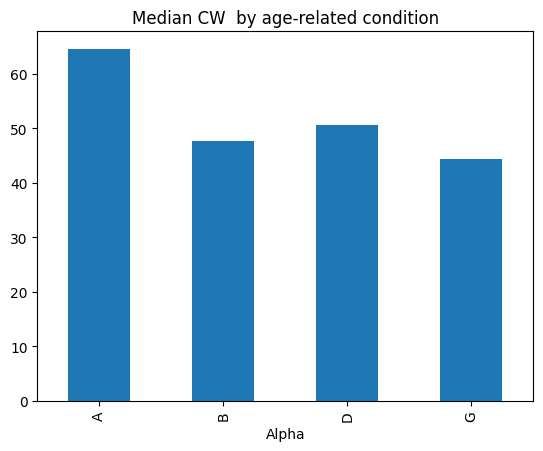

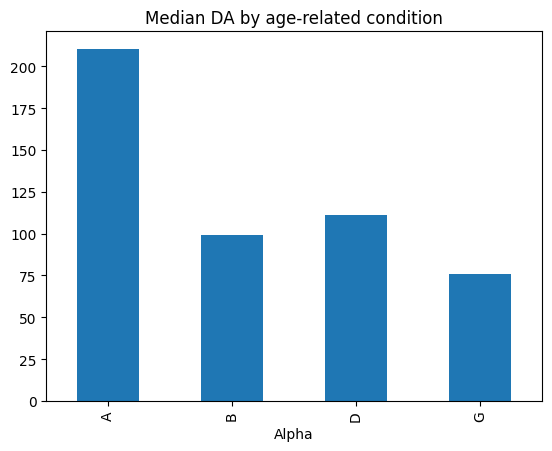

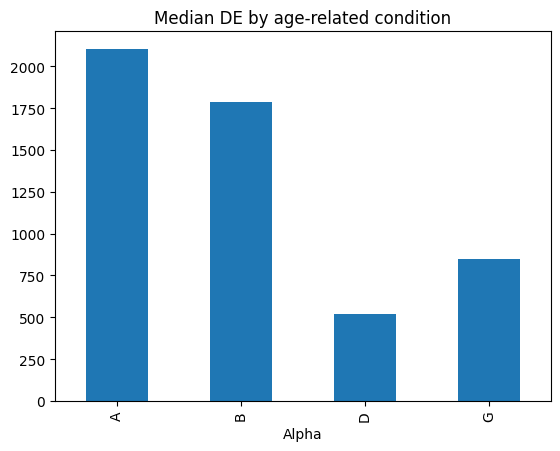

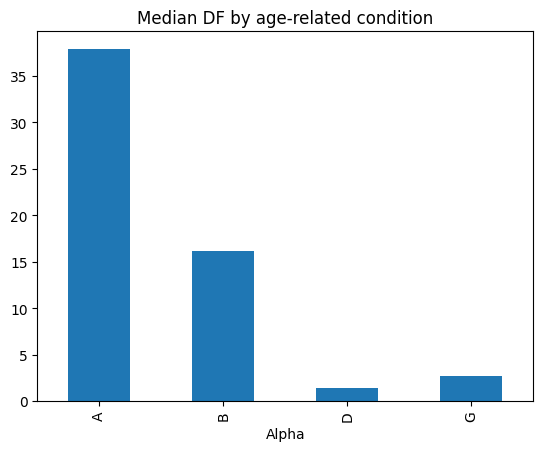

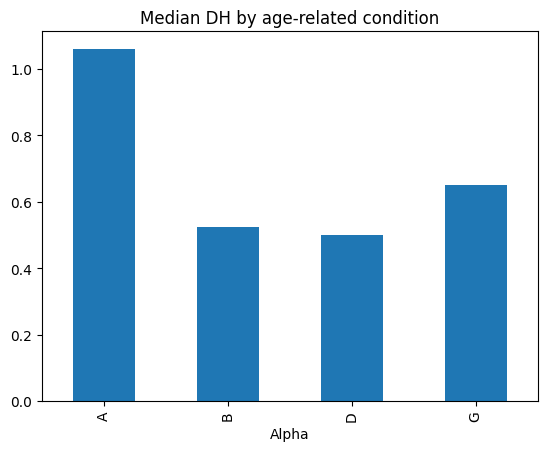

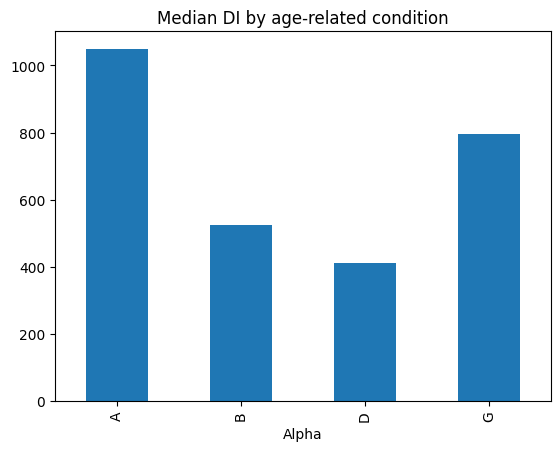

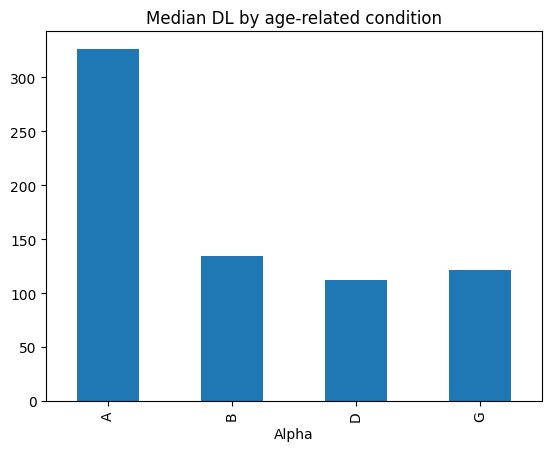

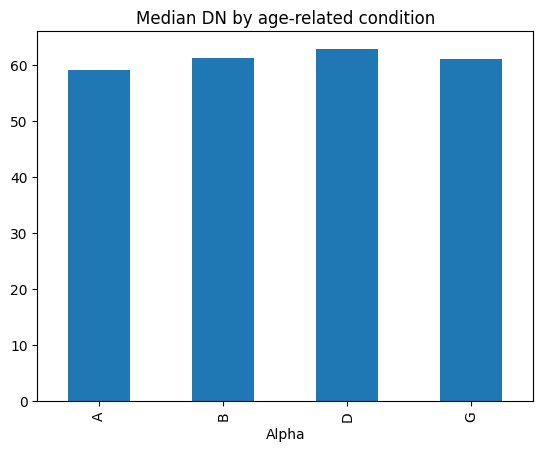

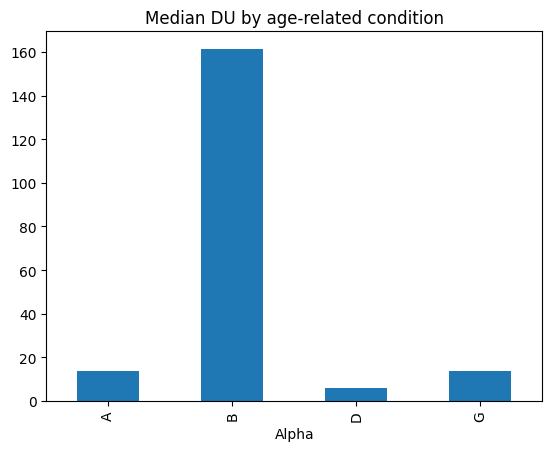

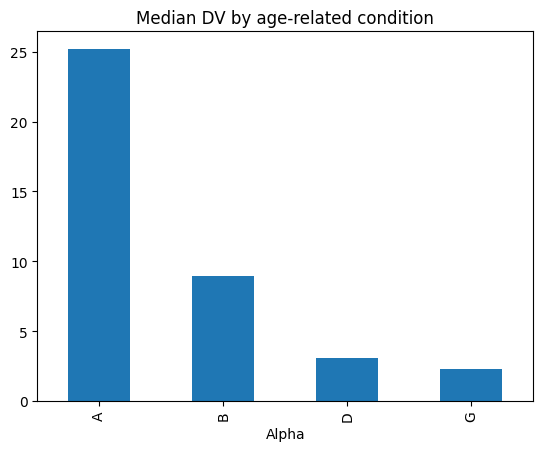

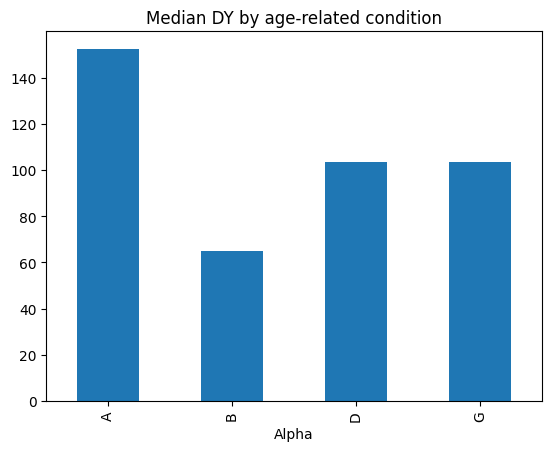

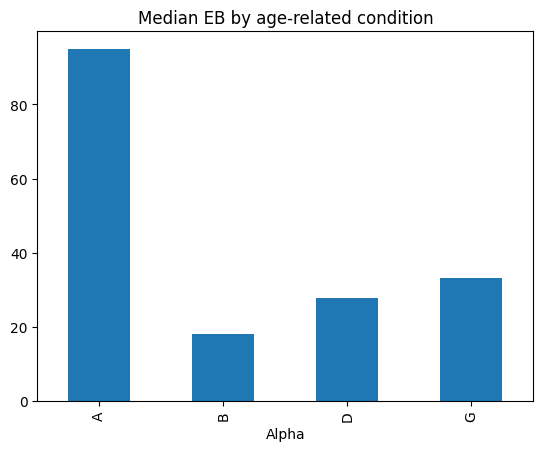

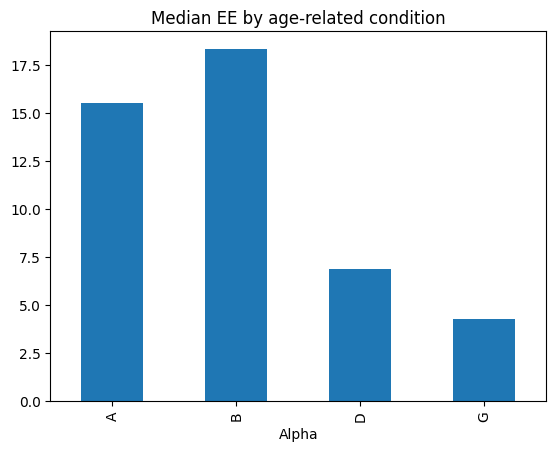

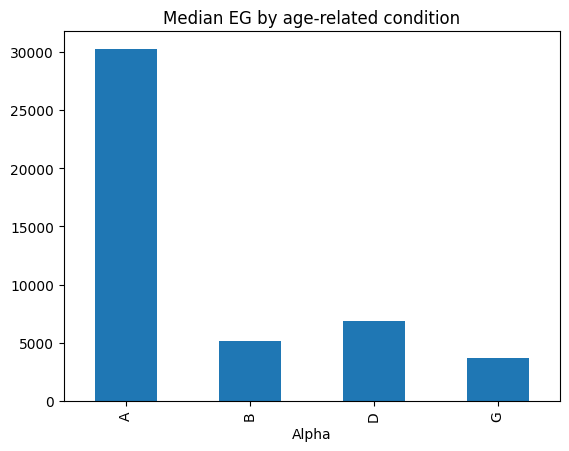

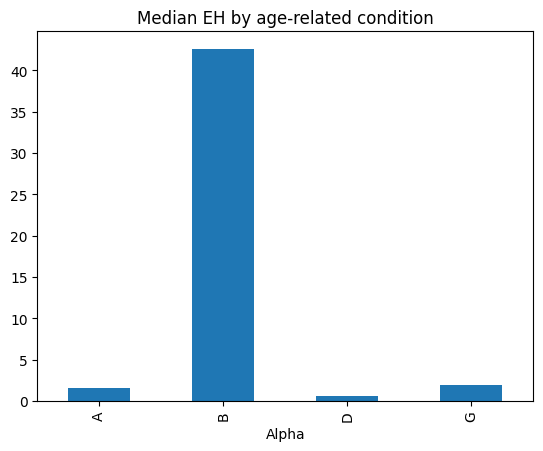

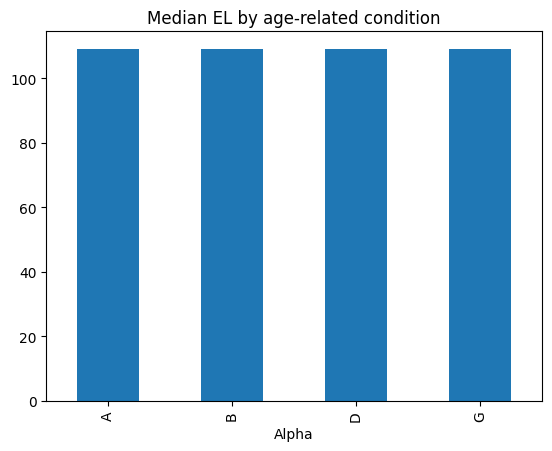

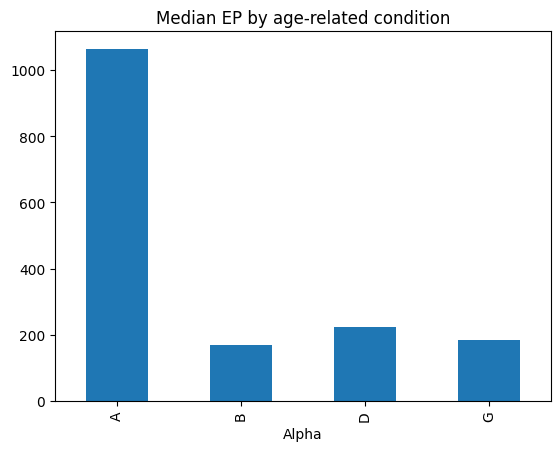

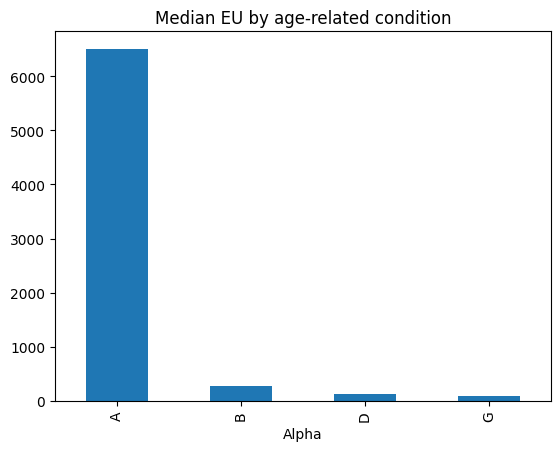

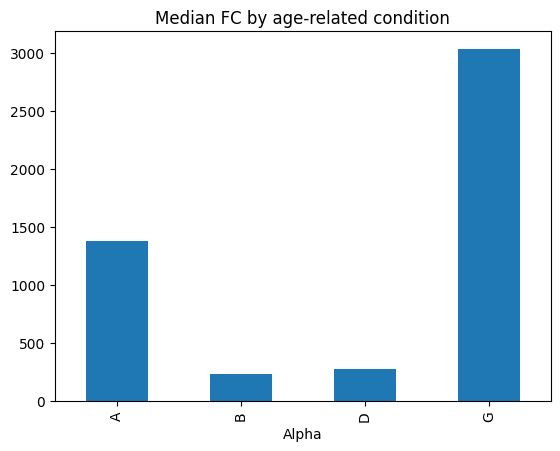

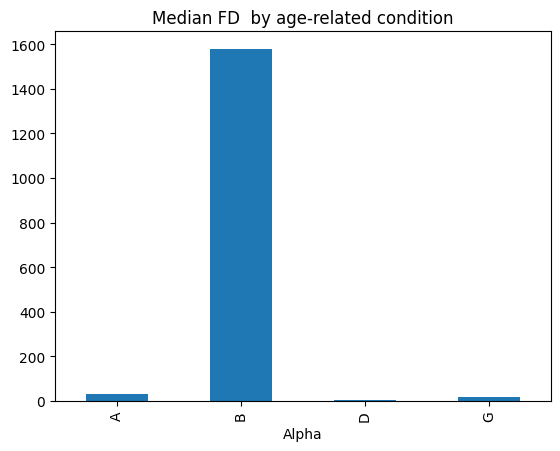

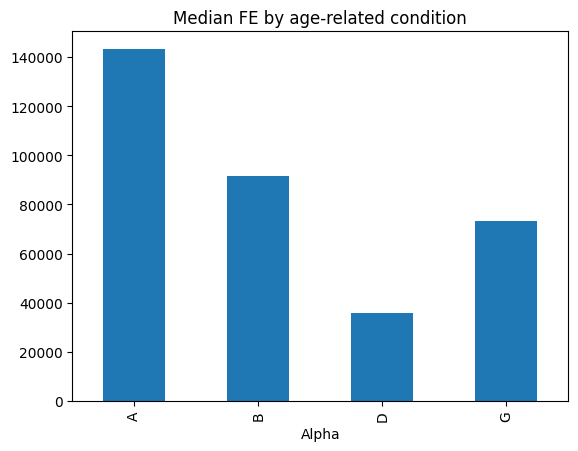

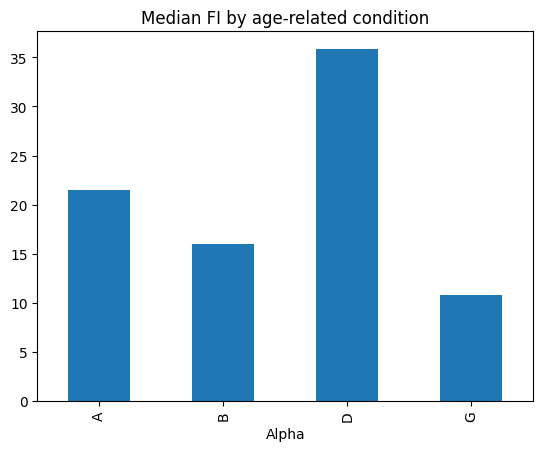

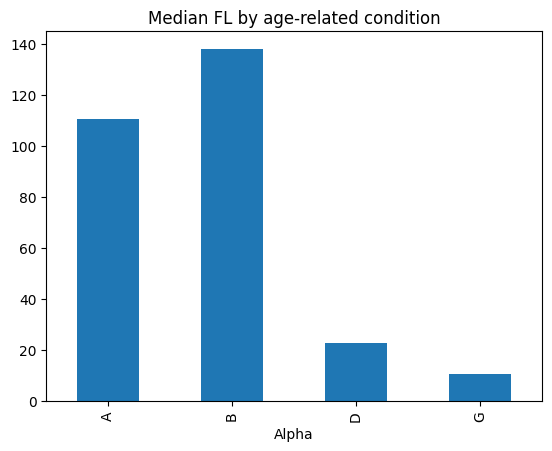

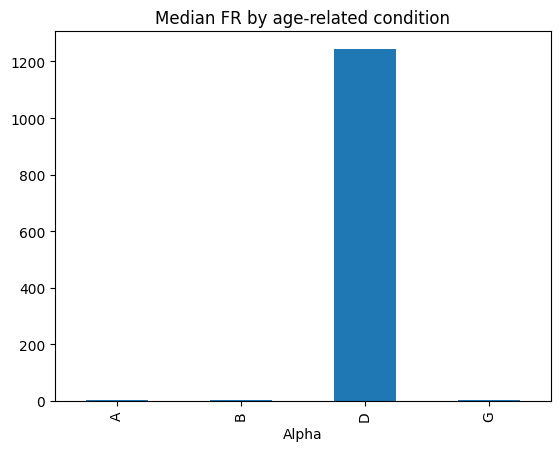

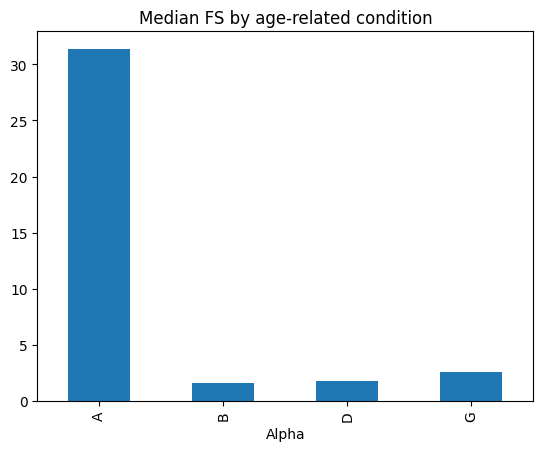

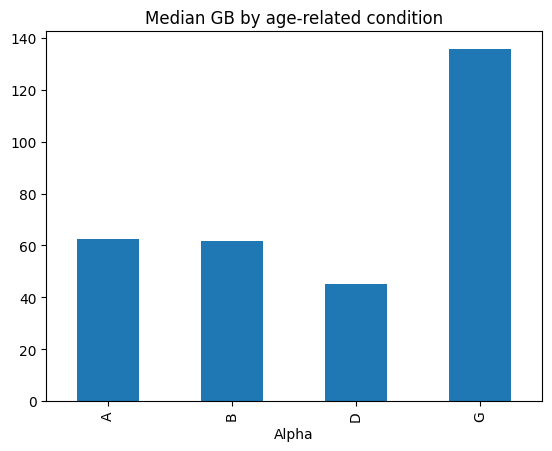

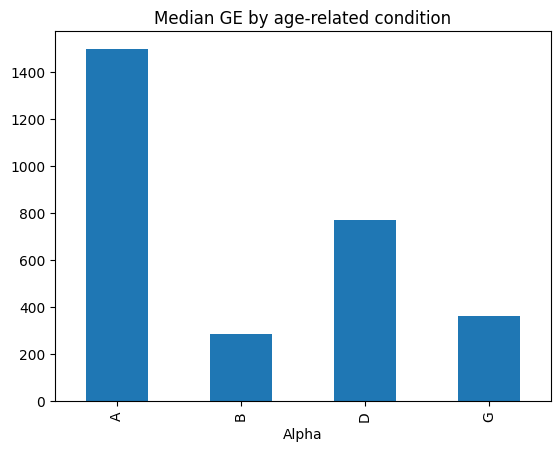

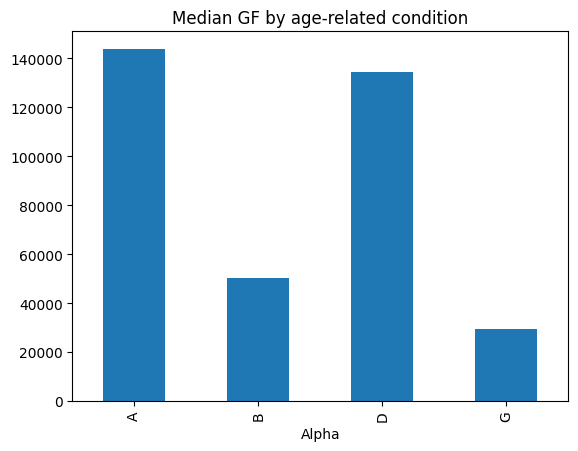

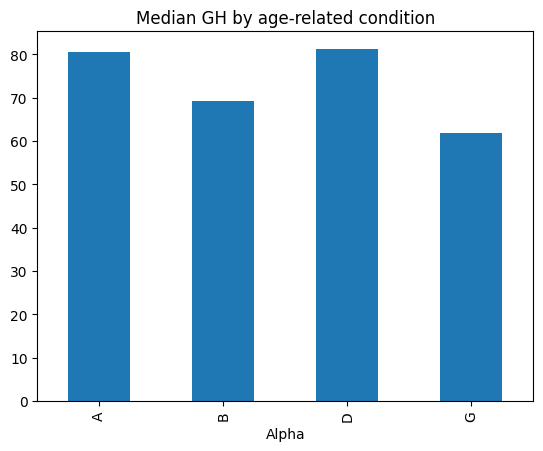

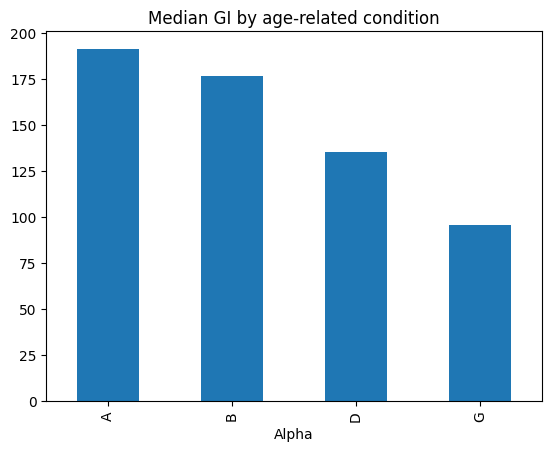

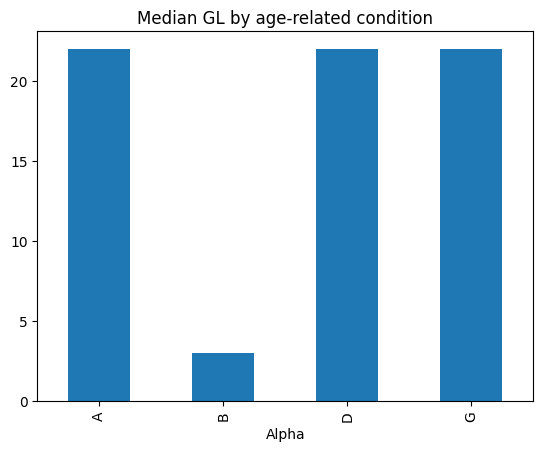

In [18]:
for col in numeric_cols:
    # df.groupby("Alpha")[col].mean().plot(kind="bar")
    df.groupby("Alpha")[col].median().plot(kind="bar")
    df.groupby("Alpha")[col].min().plot(kind="bar")
    df.groupby("Alpha")[col].max().plot(kind="bar")

    plt.title(f"Median {col} by age-related condition")
    plt.show()

<Axes: >

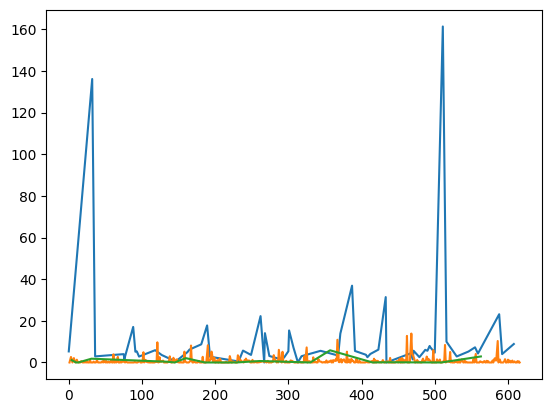

In [19]:
patients_b["DU"].plot()
patients_healthy["DU"].plot()
patients_d["DU"].plot()

<Axes: >

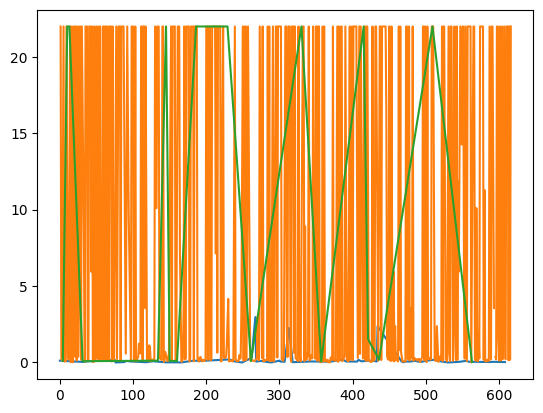

In [20]:
patients_b["GL"].plot()
patients_healthy["GL"].plot()
patients_d["GL"].plot()